# Using fake news to predict party, demographics, and more!

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

# query dataframe where key = value
def q(d: pd.DataFrame,k,v):
  return d[d[k] == v]

# query dataframe with lists of key/value pairs
def qlist(d: pd.DataFrame, ks: list, vs: list):
  df = d
  while (ks and vs): # checks for empty
    k = ks.pop()
    v = vs.pop()

    df = q(df, k, v)
    print(k, v)
  return df

def nums(df: pd.DataFrame) -> pd.DataFrame:
  return df.select_dtypes(include=np.number)

# slice dataframe where applying a lambda to the value in the key column would
# evaluate to true (work in progress)
def qlam(d: pd.DataFrame,k=[],lam=lambda x: not pd.isna(x)):
  return d.loc[[lam(d[k])]]

def space(n: int = 1):
  for i in range(n):
    print('\n' + '*'*10 + '\n')

In [3]:
#slide 1

headline_resps = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2016-12-fake-news-survey/master/data/headline-responses.csv')
display(headline_resps.head(10))
display(headline_resps.info())

space()

# get all responses from a given participant
def participant_responses(id):
  return q(headline_resps,'ID',str(id))

display(participant_responses(1141122260))

space()

raw_data = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2016-12-fake-news-survey/master/data/raw-data.csv')
display(raw_data.head(10))
display(raw_data.info())

,ID,headline,order,recalled,accuracy,Weightvar,accuracy_bool,recalled_bool,is_fake
0,1141122260,A,1,unsure,NaN,0.708267,NaN,False,True
1,1141122260,B,6,no,NaN,0.708267,NaN,False,True
2,1141122260,C,3,no,NaN,0.708267,NaN,False,True
3,1141122260,G,4,unsure,NaN,0.708267,NaN,False,False
4,1141122260,H,5,unsure,NaN,0.708267,NaN,False,False
5,1141122260,I,2,unsure,NaN,0.708267,NaN,False,False
6,1146768496,A,3,yes,not at all accurate,0.585417,False,True,True
7,1146768496,C,4,no,NaN,0.585417,NaN,False,True
8,1146768496,E,1,yes,very accurate,0.585417,True,True,True
9,1146768496,F,6,no,NaN,0.585417,NaN,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18090 entries, 0 to 18089
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             18090 non-null  object 
 1   headline       18090 non-null  object 
 2   order          18090 non-null  int64  
 3   recalled       18090 non-null  object 
 4   accuracy       4135 non-null   object 
 5   Weightvar      18090 non-null  float64
 6   accuracy_bool  4135 non-null   object 
 7   recalled_bool  18090 non-null  bool   
 8   is_fake        18090 non-null  bool   
dtypes: bool(2), float64(1), int64(1), object(5)
memory usage: 1.0+ MB


None


**********



,ID,headline,order,recalled,accuracy,Weightvar,accuracy_bool,recalled_bool,is_fake
0,1141122260,A,1,unsure,NaN,0.708267,NaN,False,True
1,1141122260,B,6,no,NaN,0.708267,NaN,False,True
2,1141122260,C,3,no,NaN,0.708267,NaN,False,True
3,1141122260,G,4,unsure,NaN,0.708267,NaN,False,False
4,1141122260,H,5,unsure,NaN,0.708267,NaN,False,False
5,1141122260,I,2,unsure,NaN,0.708267,NaN,False,False



**********



,Respondent_Serial,ID,ReturnCode,IDType,USHOU1,MRK_SMPGRP,MRK_SMPSRC,IISPanelistID,DP_INCOME,DP_GENAGE,...,DKIDS01_3_DKIDS01_Rel,DKIDS01_4_DKIDS01_Rel,DKIDS01_5_DKIDS01_Rel,DKIDS01_6_DKIDS01_Rel,DKIDS01_7_DKIDS01_Rel,DKIDS01_8_DKIDS01_Rel,DKIDS01_9_DKIDS01_Rel,DKIDS01_10_DKIDS01_Rel,DKIDS01_11_DKIDS01_Rel,DKIDS01_12_DKIDS01_Rel
0,6,1141122260,9,1,1,1,2,NaN,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,1146768496,9,1,3,1,2,NaN,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1143062614,9,1,1,1,2,NaN,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,C1439717771,9,1,3,1,3,NaN,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,C1439718289,9,1,3,1,3,NaN,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15,1001060750,9,1,1,1,2,NaN,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,18,1147306114,9,1,1,1,2,NaN,4,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,19,1141404252,9,1,1,1,2,NaN,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20,1146983406,9,1,3,1,2,NaN,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,24,1141323230,9,1,5,1,2,NaN,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Columns: 418 entries, Respondent_Serial to DKIDS01_12_DKIDS01_Rel
dtypes: float64(195), int64(210), object(13)
memory usage: 9.6+ MB


None

## This next section runs for a long time, so be prepared to wait up to 5 minutes!

In [4]:
# slide 2

clean_headlines = headline_resps
# a guess is "accurate" when recalled_bool matches is_fake
clean_headlines['accuracy_bool'] = list(map(
  lambda x: x[0] == x[1],
  zip(clean_headlines['recalled_bool'], clean_headlines['is_fake'])
))

clean_headlines = clean_headlines.replace(to_replace=False, value=0)
clean_headlines = clean_headlines.replace(to_replace=True, value=1)

# for replacing values throughout the dataframe
def repl(d: pd.DataFrame,id,h,repl):
  d.loc[d['ID'] == id, h] = repl


# collapse the responses down to one observation
clean_headlines = pd.get_dummies(
    clean_headlines,
    columns = ['headline']
)
for i,row in clean_headlines.iterrows():
  id = row['ID']
  ord = row['order']
  rec = row['recalled_bool']
  acc = row['accuracy_bool']
  isf = row['is_fake']

  # find which headline we're looking at
  h = ''
  for headline in clean_headlines.columns[8:19]:
    if row[headline] > 0:
      h = headline
      break

  # update question order
  repl(clean_headlines,id,h,ord)
  # update recalled per question
  rec_head = 'recalled_' + h
  repl(clean_headlines,id,rec_head,rec)
  # update accuracy per question
  acc_head = 'accuracy_' + h
  repl(clean_headlines,id,acc_head,acc)
  # update is_fake per question
  isf_head = 'is_fake_' + h
  repl(clean_headlines,id,isf_head,isf)

# drop the remaining duplicate responses
clean_headlines.drop_duplicates(subset=['ID'], inplace=True)

# accuracy/recalled/is_fake now stored in other cols
clean_headlines = clean_headlines.drop(
  ['order','recalled','recalled_bool','accuracy','accuracy_bool','is_fake'],
  axis=1
)

display(clean_headlines)

# print the entire column list, no truncate
import sys
np.set_printoptions(threshold=sys.maxsize)
display(np.array(clean_headlines.columns))

,ID,Weightvar,headline_A,headline_B,headline_C,headline_D,headline_E,headline_F,headline_G,headline_H,...,is_fake_headline_F,recalled_headline_J,accuracy_headline_J,is_fake_headline_J,recalled_headline_D,accuracy_headline_D,is_fake_headline_D,recalled_headline_K,accuracy_headline_K,is_fake_headline_K
0,1141122260,0.708267,1,6,3,0,0,0,4,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1146768496,0.585417,3,0,4,0,1,6,2,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1143062614,1.273979,1,0,5,0,2,0,0,4,...,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
18,C1439717771,1.514353,0,3,5,2,0,1,0,6,...,0.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0
24,C1439718289,0.697680,0,1,2,3,0,6,0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18060,1100868554,0.838827,0,1,5,2,0,6,0,4,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN
18066,1141294721,1.058158,0,6,0,5,3,1,0,0,...,0.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0
18072,1134301137,1.409168,1,4,6,0,0,3,5,2,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18078,1125834712,0.838827,6,0,0,5,4,0,3,0,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0


array(['ID', 'Weightvar', 'headline_A', 'headline_B', 'headline_C',
       'headline_D', 'headline_E', 'headline_F', 'headline_G',
       'headline_H', 'headline_I', 'headline_J', 'headline_K',
       'recalled_headline_A', 'accuracy_headline_A', 'is_fake_headline_A',
       'recalled_headline_B', 'accuracy_headline_B', 'is_fake_headline_B',
       'recalled_headline_C', 'accuracy_headline_C', 'is_fake_headline_C',
       'recalled_headline_G', 'accuracy_headline_G', 'is_fake_headline_G',
       'recalled_headline_H', 'accuracy_headline_H', 'is_fake_headline_H',
       'recalled_headline_I', 'accuracy_headline_I', 'is_fake_headline_I',
       'recalled_headline_E', 'accuracy_headline_E', 'is_fake_headline_E',
       'recalled_headline_F', 'accuracy_headline_F', 'is_fake_headline_F',
       'recalled_headline_J', 'accuracy_headline_J', 'is_fake_headline_J',
       'recalled_headline_D', 'accuracy_headline_D', 'is_fake_headline_D',
       'recalled_headline_K', 'accuracy_headline_K', 'is

# Merging Headlines and Raw Data


In [5]:
headlines = { # Could be expanded on with more time
    'A': 'Pope Francis Shocks World, Endorses Donald Trump for President, Releases Statement',
    'B': 'Donald Trump Sent His Own Plane to Transport 200 Stranded Marines',
    'C': 'FBI Agent Suspected in Hillary Email Leaks Found Dead in Apparent Murder - Suicide',
    'D': 'Donald Trump Protester Speaks Out: “I Was Paid $3,500 to Protest Trump’s Rally”',
    'E': 'FBI Director Comey Just Put a Trump Sign On His Front Lawn',
    'F': 'Melania Trump’s Girl-on-Girl Photos From Racy Shoot Revealed',
    'G': 'Barbara Bush: “I don’t know how women can vote” for Trump',
    'H': 'Donald Trump Says He’d ‘Absolutely’ Require Muslims to Register',
    'I': 'Trump: “I Will Protect Our LGBTQ Citizens”',
    'J': 'I Ran the C.I.A Now I’m Endorsing Hillary Clinton',
    'K': 'Donald Trump on Refusing Presidential Salary: “I’m not taking it”',
}

In [6]:
# slide 2

combined = clean_headlines.merge(raw_data, how='inner', on='ID')
display(np.array(combined.columns))
display('columns: ', len(combined.columns))

# borrowed extensively from
# https://github.com/BuzzFeedNews/2016-12-fake-news-survey/blob/master/notebooks/survey-analysis.ipynb

combined["party"] = combined["DWD1"].apply({
    1: "Democrat",
    2: "Republican"
}.get).fillna("Independent/other")

for c in 'ABCDEFGHIJK':
  combined['believed_fake_'+c] = combined.apply(
      lambda r: 1 if r['is_fake_headline_'+c] == 1 and r['accuracy_headline_'+c] == 0 else 0,
      axis=1
  )
cols = ['believed_fake_'+c for c in 'ABCDEFGHIJK']
combined['fake_news_believed_count'] = combined[cols].apply(np.sum,axis=1)

combined["voted_for"] = combined["DWD6"].apply({
    1.0: "Clinton",
    2.0: "Trump",
    3.0: "Johnson",
    4.0: "Stein",
    5.0: "Other"
}.get).fillna("Other")

combined["facebook_as_news_source"] = combined["GRID_DWD11_4_DWD11"].apply({
    1: 2,
    2: 1,
    3: 0,
    4: 0,
    5: 0
}.get).fillna(0)

combined = combined.drop(
    ['DWD1','DWD6','GRID_DWD11_4_DWD11'],
    axis=1,
)

combined = combined.merge(pd.get_dummies(
    combined,
    columns = ['party', 'voted_for','HCAL_REGION1_Label_US'],
)).fillna(-1) # FIX THIS, NOT MEANINGFUL RE-ENCODING

display(np.array(combined.columns))
display('columns', len(combined.columns))

array(['ID', 'Weightvar_x', 'headline_A', 'headline_B', 'headline_C',
       'headline_D', 'headline_E', 'headline_F', 'headline_G',
       'headline_H', 'headline_I', 'headline_J', 'headline_K',
       'recalled_headline_A', 'accuracy_headline_A', 'is_fake_headline_A',
       'recalled_headline_B', 'accuracy_headline_B', 'is_fake_headline_B',
       'recalled_headline_C', 'accuracy_headline_C', 'is_fake_headline_C',
       'recalled_headline_G', 'accuracy_headline_G', 'is_fake_headline_G',
       'recalled_headline_H', 'accuracy_headline_H', 'is_fake_headline_H',
       'recalled_headline_I', 'accuracy_headline_I', 'is_fake_headline_I',
       'recalled_headline_E', 'accuracy_headline_E', 'is_fake_headline_E',
       'recalled_headline_F', 'accuracy_headline_F', 'is_fake_headline_F',
       'recalled_headline_J', 'accuracy_headline_J', 'is_fake_headline_J',
       'recalled_headline_D', 'accuracy_headline_D', 'is_fake_headline_D',
       'recalled_headline_K', 'accuracy_headline_K', '

'columns: '

463

array(['ID', 'Weightvar_x', 'headline_A', 'headline_B', 'headline_C',
       'headline_D', 'headline_E', 'headline_F', 'headline_G',
       'headline_H', 'headline_I', 'headline_J', 'headline_K',
       'recalled_headline_A', 'accuracy_headline_A', 'is_fake_headline_A',
       'recalled_headline_B', 'accuracy_headline_B', 'is_fake_headline_B',
       'recalled_headline_C', 'accuracy_headline_C', 'is_fake_headline_C',
       'recalled_headline_G', 'accuracy_headline_G', 'is_fake_headline_G',
       'recalled_headline_H', 'accuracy_headline_H', 'is_fake_headline_H',
       'recalled_headline_I', 'accuracy_headline_I', 'is_fake_headline_I',
       'recalled_headline_E', 'accuracy_headline_E', 'is_fake_headline_E',
       'recalled_headline_F', 'accuracy_headline_F', 'is_fake_headline_F',
       'recalled_headline_J', 'accuracy_headline_J', 'is_fake_headline_J',
       'recalled_headline_D', 'accuracy_headline_D', 'is_fake_headline_D',
       'recalled_headline_K', 'accuracy_headline_K', '

'columns'

534

# Output of Data Cleanup Stage

clean_headlines is a dataframe where each observation is the entirety of a survey filled out by one participant. This differs from the original data source, which had a separate observation for each question.

The dataframe has ONE of the following columns per observation:

| Col | Meaning |
|-----|---------|
| ID | unique ID for survey participant |
| Weightvar | the weight assigned to unique participant |

The dataframe has ONE of the following columns FOR EACH QUESTION [#] (A through K) per participant:

| Col | Meaning | Responses |
|-----|---------|-----------|
| headline_# | what order the headline was presented | 0: not presented <br> 1-11: order presented |
| recalled_# | the participant recalled the headline in question | *pd.NaN*: not presented <br> 0: did not remember <br> 1: did remember |
| accuracy_# | the participant's memory matches reality | *pd.NaN*: not presented <br> 0: did not remember <br> 1: did remember |
| accuracy_# | the participant correctly says fake or not | *pd.NaN*: not presented <br> 0: did not remember <br> 1: did remember |
| recalled_# | the participant recalls the story | *pd.NaN*: not presented <br> 0: did not remember <br> 1: did remember |
| is_fake_# | the story was actually fake | *pd.NaN*: not presented <br> 0: did not remember <br> 1: did remember |
| HCAL_REGION1_Label_US_[State] | If respondent is from that US state | 0: not from State <br> 1: from State |



# Now that we have all of our data in one easy to read/access place, how do we determine which variables are the most important?

,Weightvar_x,headline_A,headline_B,headline_C,headline_D,headline_E,headline_F,headline_G,headline_H,headline_I,...,HCAL_REGION1_Label_US_South Dakota,HCAL_REGION1_Label_US_Tennessee,HCAL_REGION1_Label_US_Texas,HCAL_REGION1_Label_US_Utah,HCAL_REGION1_Label_US_Vermont,HCAL_REGION1_Label_US_Virginia,HCAL_REGION1_Label_US_Washington,HCAL_REGION1_Label_US_West Virginia,HCAL_REGION1_Label_US_Wisconsin,HCAL_REGION1_Label_US_Wyoming
Weightvar_x,7.738532e-11,-1.581815e-07,9.908515e-07,-1.209408e-06,-1.478576e-06,8.865469e-06,1.600171e-05,-1.579217e-05,1.032952e-05,1.014958e-04,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,7.071058e-01
headline_A,-1.790823e-11,3.297736e-07,-1.964650e-07,5.235357e-07,-1.972630e-06,-2.102438e-05,2.761971e-05,9.007835e-06,1.687981e-05,-3.234993e-05,...,-6.616363e-23,-1.304863e-21,-2.025517e-21,1.830329e-21,-4.454823e-22,9.190447e-22,1.170631e-21,-2.088721e-21,4.453549e-22,1.140752e-03
headline_B,-6.016101e-11,1.134011e-07,6.242522e-07,4.373295e-07,-6.900317e-07,-3.569874e-05,1.280530e-05,-4.999378e-07,-3.021459e-05,3.898213e-05,...,1.491827e-21,2.628683e-21,2.387313e-21,2.078315e-21,2.336869e-21,1.336139e-22,2.322316e-22,-1.369179e-21,1.364350e-21,1.120577e-04
headline_C,5.706300e-11,2.298658e-07,-3.621525e-07,3.643025e-06,2.983366e-09,-1.240991e-05,2.672469e-05,-9.263435e-06,-1.840594e-04,-3.444469e-06,...,-1.019429e-21,-1.322721e-21,-4.983181e-21,8.301088e-22,3.183896e-21,1.673482e-21,3.781832e-21,-2.305826e-21,4.473696e-21,9.686424e-05
headline_D,-6.811090e-11,-3.995066e-07,7.280293e-08,-2.296841e-06,1.498305e-06,-2.776234e-05,1.634700e-05,9.601790e-06,-9.838533e-06,-4.436504e-05,...,-7.727541e-21,1.154327e-20,5.921260e-22,1.752026e-20,-7.259097e-21,1.763930e-20,-1.792195e-20,-9.139276e-21,1.335172e-20,1.108171e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCAL_REGION1_Label_US_Virginia,-3.548712e-12,1.059716e-08,-5.276827e-07,1.361365e-06,2.411351e-06,-7.375907e-07,7.131079e-06,-4.569455e-06,-5.695360e-07,-8.580108e-06,...,-2.362979e-17,1.340830e-17,-1.562990e-17,1.710863e-17,3.458859e-18,2.943482e-17,-7.707812e-18,8.386976e-18,-1.620007e-17,-4.213802e-10
HCAL_REGION1_Label_US_Washington,-6.989413e-12,-9.186551e-09,7.484341e-07,5.221359e-07,3.096583e-06,1.833087e-07,-1.390925e-06,3.881757e-06,-3.025778e-06,-5.019469e-06,...,-1.130043e-17,2.112799e-17,-8.702281e-18,1.960735e-17,-5.427685e-18,2.701404e-17,-1.027863e-17,1.726811e-17,-2.083311e-17,-2.358897e-10
HCAL_REGION1_Label_US_West Virginia,-2.487253e-12,2.103191e-08,-1.219766e-07,2.293598e-07,7.584729e-07,-8.772184e-07,-4.649026e-06,2.195031e-07,1.883583e-05,4.760294e-06,...,-2.505324e-17,1.448111e-17,-1.535855e-17,1.855618e-17,3.960427e-18,3.157925e-17,-9.135020e-18,8.963622e-18,-1.707768e-17,-6.223452e-10
HCAL_REGION1_Label_US_Wisconsin,-4.831561e-12,-7.779231e-09,4.157893e-08,2.109347e-07,1.882425e-06,2.638910e-06,-9.405295e-07,6.474996e-07,-1.394478e-06,4.139449e-06,...,-2.533462e-17,7.967683e-18,-1.561124e-17,1.389974e-17,4.078452e-18,2.841917e-17,-1.677697e-17,2.678179e-18,-1.872585e-17,1.284127e-09


Explained Variance Plot


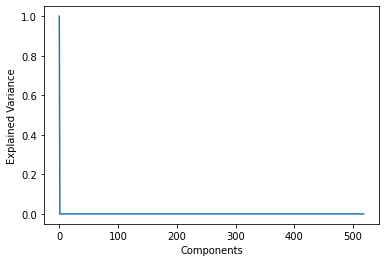

None

In [7]:
# slide 4

from sklearn.decomposition import PCA

# thanks to this post on stack overflow
# https://stackoverflow.com/questions/23282130/principal-components-analysis-using-pandas-dataframe

# only get the columns with numerical data types to start
combined_numeric = nums(combined)

# standardize
clean_num = combined_numeric
clean_num_norm = (clean_num - clean_num.mean()) / clean_num.std()

# pca
pca = PCA(n_components=clean_num.shape[1])
pca.fit(clean_num)

# corr matrix
loadings = pd.DataFrame(
  pca.components_.T,
  columns=[c for c in clean_num_norm.columns],
  index=clean_num.columns
)

display(loadings)

import matplotlib.pyplot as plot

print('Explained Variance Plot')
plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
display(plot.show())

## The above graph shows we don't need 456 components to accurately predict our features. As a matter of fact, we need less than 10. So, what do we do next?

With this dataframe, we can see which Primary Components explain variance best for each individual features. So, if we want to best predict any of our features, we should probably pick only those components that are above a certain threshold of "explaining power".

But before we try our bespoke feature picking, we can have a library do it for us as a benchmark.

In [8]:
# slide 4

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

def train_for_feature(df: pd.DataFrame, y='voted_for_Trump', k=5,drop=[]):
  # determine the 5 most impactful features of the training data
  anova_filter = SelectKBest(f_regression, k=k)
  clf = SVC(gamma='auto', kernel='rbf')
  anova_svm = make_pipeline(anova_filter, clf)

  # train on everything except the column we're predicting and the columns the
  # user says to drop
  X = nums(df.drop([y] + drop,axis=1))
  y = df[y]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  anova_svm.fit(X_train, y_train)
  display(anova_filter.get_feature_names_out()) # uncomment for displaying the library's k picked
  return anova_svm.score(X_test, y_test)

def test_for_y(df,y='voted_for_Trump',k_lim=10,trials=10,drop=[]):
  sum = 0
  avgs = {}
  # for each k up to k_lim, do 10 trials and take the average accuracy
  for k in range(1,k_lim+1):
    for i in range(1,trials+1):
      sum += train_for_feature(df, y, k, drop)
    avg = sum/trials
    avgs[k] = avg
    sum = 0
  return avgs

drop=['recalled_headline_A','believed_fake_A','LOOPDWD7_DWD8_A_DWD7']
display(test_for_y(df=combined,y='accuracy_headline_A',k_lim=10,trials=10,drop=drop))
#print('*******\n\n\n\n\n\n\n\n')
#test_for_y(df=combined,y='voted_for_Trump',k_lim=10,trials=10,drop=['voted_for_Clinton','voted_for_Other','voted_for_Johnson','voted_for_Stein'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_A_DWD8', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_A_DWD8',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_A_DWD8',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_B_DWD7', 'LOOPDWD7_DWD8_A_DWD8',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_A_DWD8',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_A_DWD8',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_A_DWD8',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_E',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_D',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_E',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_E',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_D_DWD7',
       'LOOPDWD7_DWD8_A_DWD8', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_D',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_D',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_E_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_E',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_B',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_E',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'is_fake_headline_C',
       'QUOTA_HEADSLINES_ATOE1', 'QUOTA_HEADSLINES_ATOE3',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_A_DWD8',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'is_fake_headline_D',
       'QUOTA_HEADSLINES_ATOE1', 'QUOTA_HEADSLINES_ATOE4',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'is_fake_headline_B',
       'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_B_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_B',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_D_DWD7',
       'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_E',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_D',
       'believed_fake_E', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'LOOPDWD7_DWD8CNT',
       'believed_fake_C', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'LOOPDWD7_DWD8CNT',
       'believed_fake_D', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_D_DWD7',
       'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_C',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'is_fake_headline_D',
       'QUOTA_HEADSLINES_ATOE1', 'QUOTA_HEADSLINES_ATOE4',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_D_DWD7',
       'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_D',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_D_DWD7',
       'LOOPDWD7_DWD8_A_DWD8', 'LOOPDWD7_DWD8CNT', 'believed_fake_E',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'is_fake_headline_D',
       'QUOTA_HEADSLINES_ATOE1', 'QUOTA_HEADSLINES_ATOE4',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_D',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'is_fake_headline_D',
       'QUOTA_HEADSLINES_ATOE1', 'QUOTA_HEADSLINES_ATOE4',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_D',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_D_DWD7',
       'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_D', 'believed_fake_E',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'LOOPDWD7_DWD8CNT',
       'believed_fake_B', 'believed_fake_E', 'fake_news_believed_count'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_D_DWD7',
       'LOOPDWD7_DWD8_A_DWD8', 'LOOPDWD7_DWD8CNT', 'believed_fake_E',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'QUOTA_HEADSLINES_ATOE3',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'LOOPDWD7_DWD8CNT',
       'believed_fake_E', 'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'is_fake_headline_D',
       'QUOTA_HEADSLINES_ATOE1', 'QUOTA_HEADSLINES_ATOE4',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_D_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_D',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'is_fake_headline_C',
       'QUOTA_HEADSLINES_ATOE1', 'QUOTA_HEADSLINES_ATOE3',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'believed_fake_E',
       'fake_news_believed_count'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array(['headline_A', 'is_fake_headline_A', 'QUOTA_HEADSLINES_ATOE1',
       'MRK_ORD_LOOPDWD7_DWD8_A_ORD_LOOPDWD7_DWD8',
       'LOOPDWD7_DWD8_C_DWD7', 'LOOPDWD7_DWD8_A_DWD8', 'LOOPDWD7_DWD8CNT',
       'believed_fake_C', 'believed_fake_E', 'fake_news_believed_count'],
      dtype=object)

{1: 0.8880597014925371,
 2: 0.8897180762852404,
 3: 0.8872305140961856,
 4: 0.8907131011608623,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0}

# This library does quite well on its own!

The library consistently predicts correctly between 80% and 90% of the time on a 20% train/test split of our original data, however it starts to overfit at k=5.

# What about finding out which features specifically are having the most impact?

We can use our PCA table from before!

In [9]:
# slide 4
def get_pcas(c,df=loadings):
  return dict(df.loc[[c]].iloc[0])

def k_impactful(c,k=5,scores=False):
  d = get_pcas(c)
  kpcs = sorted(
      d,
      key=lambda p: abs(d.get(p)),
      reverse=True
  )[:k]

  if scores == True:
    return dict(zip(
        kpcs,
        [d[pc] for pc in kpcs]
    ))
  else:
    return kpcs

# just for fun :)
def k_least_impactful(c,k=5,scores=False):
  d = get_pcas(c)

  kpcs = sorted(
      d,
      key=lambda p: abs(d.get(p)),
      reverse=False
  )[:k]

  if scores == True:
    return dict(zip(
        kpcs,
        [d[pc] for pc in kpcs]
    ))
  else:
    return kpcs

def k_for_c(c='voted_for_Trump',k=10,scores=True):
  # print('Most Impactful for', c)
  return k_impactful(c,k,scores)



accuracies = {}
k=5
for h in 'ABCDEFGHIJK':
  c='accuracy_headline_'+h
  accuracies[h] = k_for_c(c,k,scores=False)

display(accuracies)
display(np.unique(np.ndarray.flatten(np.array([np.array(vi) for vi in accuracies.values()]))))

{'A': ['GRID_DWD11_6_DWD11',
  'GRID_DWD11_8_DWD11',
  'GRID_DWD11_2_DWD11',
  'GRID_DWD11_7_DWD11',
  'GRID_DWD11_3_DWD11'],
 'B': ['MRK_ORDER_DWD11_5_MRK_ORDER_DWD11',
  'GRID_DWD11_6_DWD11',
  'GRID_DWD11_3_DWD11',
  'GRID_DWD11_8_DWD11',
  'GRID_DWD11_10_DWD11'],
 'C': ['GRID_DWD11_10_DWD11',
  'GRID_DWD9_3_DWD9',
  'GRID_DWD9_1_DWD9',
  'GRID_DWD9_5_DWD9',
  'MRK_SMPSRC'],
 'D': ['INDHH1030',
  'MARK_START_TIME_DWD',
  'INDHH1032',
  'DP_USHHI2_der',
  'QMktSize_83_1'],
 'E': ['GRID_DWD11_6_DWD11',
  'GRID_DWD11_1_DWD11',
  'GRID_DWD11_3_DWD11',
  'GRID_DWD9_5_DWD9',
  'QMktSize_2_1'],
 'F': ['US09KAB_AG_merged06',
  'US09KAB_AG_merged12',
  'HADD_ZipCode_US',
  'US09KAB_AG_merged04',
  'QUOTA_DWD'],
 'G': ['GRID_DWD9_6_DWD9',
  'US09KAB_AG_merged01',
  'US09KAG09',
  'usmar2_der',
  'US09KAG06'],
 'H': ['DWD10', 'US09KAB16', 'US09KAB19', 'DP_INCOME', 'US09KAG02'],
 'I': ['GRID_DWD9_4_DWD9',
  'DP_GENAGE',
  'US09KAG05',
  'US09KAG06',
  'GRID_DWD9_1_DWD9'],
 'J': ['QUOTA_HEADSLIN

array(['DP_GENAGE', 'DP_INCOME', 'DP_USHHI2_der', 'DWD10', 'DWD4',
       'GRID_DWD11_10_DWD11', 'GRID_DWD11_1_DWD11', 'GRID_DWD11_2_DWD11',
       'GRID_DWD11_3_DWD11', 'GRID_DWD11_6_DWD11', 'GRID_DWD11_7_DWD11',
       'GRID_DWD11_8_DWD11', 'GRID_DWD9_1_DWD9', 'GRID_DWD9_3_DWD9',
       'GRID_DWD9_4_DWD9', 'GRID_DWD9_5_DWD9', 'GRID_DWD9_6_DWD9',
       'HADD_ZipCode_US', 'HCAL_AGGLO_CODE_US', 'HCAL_REGION1_US',
       'INDHH1030', 'INDHH1032', 'MARK_START_TIME_DWD',
       'MRK_ORDER_DWD11_5_MRK_ORDER_DWD11', 'MRK_SMPSRC', 'QMktSize_2_1',
       'QMktSize_83_1', 'QUOTA_DWD', 'QUOTA_HEADSLINES_ATOE2', 'STATE',
       'US09KAB16', 'US09KAB19', 'US09KAB_AG_merged01',
       'US09KAB_AG_merged04', 'US09KAB_AG_merged06',
       'US09KAB_AG_merged12', 'US09KAB_AG_merged17', 'US09KAG02',
       'US09KAG05', 'US09KAG06', 'US09KAG09', 'USMAR2', 'Weightvar_y',
       'resp_age_long', 'usmar2_der'], dtype='<U33')

## Now we can see the k most impactful features for a given component, and more importantly, what values are stored in those columns!

# Now we can replicate the library's K_best from before with our bespoke feature picker!

In [10]:
# slide 5

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

def bespoke_train_for_feature(df=combined_numeric, c='voted_for_Trump', k=5,drop=[]):
  # determine the 5 most impactful features of the training data
  # anova_filter = SelectKBest(f_regression, k=k)
  clf = SVC(gamma='auto', kernel='rbf')
  anova_svm = make_pipeline(clf) # make_pipeline(anova_filter, clf)

  xcols = k_impactful(c,k)
  print(xcols)

  X = df.drop([c]+drop,axis=1)[xcols]
  y = df[c]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  anova_svm.fit(X_train, y_train)
  return anova_svm.score(X_test, y_test)

def bespoke_test_for_y(df=combined_numeric,c='voted_for_Trump',k_lim=10,trials=10,drop=[]):
  sum = 0
  avgs = {}
  for k in range(1,k_lim+1):
    for i in range(1,trials+1):
      sum += bespoke_train_for_feature(df,c,k, drop)
    avg = sum/trials
    avgs[k] = avg
    sum = 0
  return avgs

In [11]:
# slide 5

df=combined_numeric
c='accuracy_headline_A'
k_lim=10
trials=10
drop=['recalled_headline_A','believed_fake_A']
bespoke_test_for_y(df,c,k_lim,trials,drop=[])

['GRID_DWD11_6_DWD11']
['GRID_DWD11_6_DWD11']
['GRID_DWD11_6_DWD11']
['GRID_DWD11_6_DWD11']
['GRID_DWD11_6_DWD11']
['GRID_DWD11_6_DWD11']
['GRID_DWD11_6_DWD11']
['GRID_DWD11_6_DWD11']
['GRID_DWD11_6_DWD11']
['GRID_DWD11_6_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11', 'GRID_DWD11_2_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11', 'GRID_DWD11_2_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11', 'GRID_DWD11_2_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11', 'GRID_DWD11_2_DWD11']
['GRID_DWD11_6_DWD11', 'GRID_DWD11_8_DWD11', 'GRID_D

{1: 0.48540630182421235,
 2: 0.4812603648424544,
 3: 0.48673300165837474,
 4: 0.5044776119402985,
 5: 0.48805970149253736,
 6: 0.48673300165837485,
 7: 0.5003316749585407,
 8: 0.5013266998341626,
 9: 0.49353233830845766,
 10: 0.4958540630182421}

In [12]:
# slide 5

import seaborn as sns
import matplotlib.pyplot as plt

display(combined['party'].value_counts())
print()
display(combined['voted_for_Trump'].value_counts())
print()
cols=['fake_news_believed_count']
print('Trump voters')
display(q(combined,'voted_for','Trump')[cols].describe())
print('Clinton voters')
display(q(combined,'voted_for','Clinton')[cols].describe())
print('AGE BRACKET')
display(combined.groupby(['DP_GENAGE'])['fake_news_believed_count'].mean())

Democrat             1104
Independent/other     970
Republican            941
Name: party, dtype: int64

0    1986
1    1029
Name: voted_for_Trump, dtype: int64


Trump voters


,fake_news_believed_count
count,1029.000000
mean,2.383868
std,0.878500
min,0.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


Clinton voters


,fake_news_believed_count
count,1102.000000
mean,2.606171
std,0.757091
min,0.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


AGE BRACKET


DP_GENAGE
1    2.025000
2    2.438114
3    2.618395
4    2.482979
5    2.605634
6    2.636516
Name: fake_news_believed_count, dtype: float64

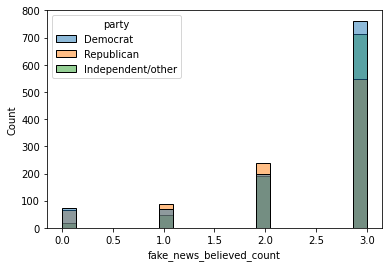

In [13]:
sns.histplot(data=combined, x="fake_news_believed_count", hue="party", multiple="layer")

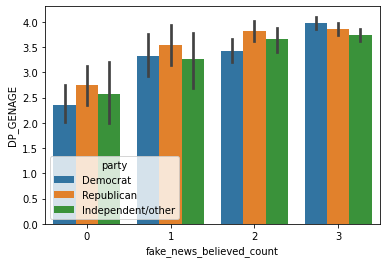

In [14]:
sns.barplot(data=combined,x='fake_news_believed_count',y='DP_GENAGE',hue='party')

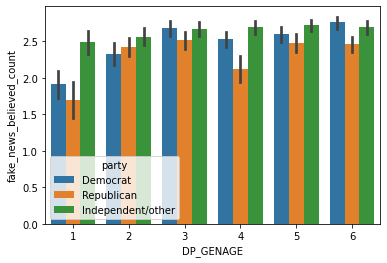

In [15]:
sns.barplot(data=combined,x='DP_GENAGE',y='fake_news_believed_count',hue='party')

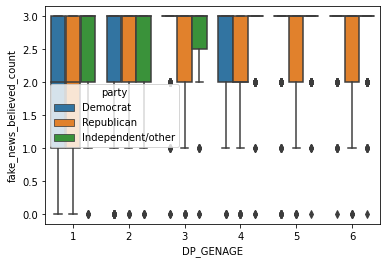

In [16]:
sns.boxplot(x='DP_GENAGE', y='fake_news_believed_count', data=combined, hue='party')